# Problem Statement:

Avocado is a fruit consumed by people heavily in the United States. 

This data was downloaded from the Hass Avocado Board website in May of 2018.

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

### Feature details

Some relevant columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU(The Product Lookup code) 4046 sold

4225 - Total number of avocados with PLU(The Product Lookup code) 4225 sold

4770 - Total number of avocados with PLU(The Product Lookup code) 4770 sold

Total Bags 

Small Bags-Number of Small Bags used

Large Bags-number of large bags used.

XLarge Bags- Number of XLarge bags used.

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

### Importing important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression , Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

import warnings
warnings.filterwarnings('ignore')

## Importing The Dataset

In [2]:
df=pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


## Data Pre-processing and Cleaning

In [3]:
#droping the unnamed column
df.drop('Unnamed: 0',axis=1,inplace=True)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
print(df.shape)
print(df.columns)
type(df)

(18249, 13)
Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')


pandas.core.frame.DataFrame

There are 18249 rows and 13 columns in the Dataset.

we will be doing model regression with 'AveragePrice'as target column and model Classification 'Region' as target column.

In [5]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
df.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


'Date','Year' and 'type' are of object dtype. Rest of the columns are either float type or int type.

There are no null values in the dataset.

In [8]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [9]:
# Checking any null value presends in dataset
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Here also we can see there is no null values in the dataset.

In [10]:
# we have date column also in dataset and its datatype is objects, lets change into datetime format
df["Date"] = pd.to_datetime(df["Date"])
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [11]:
# Creating columns for Day,and month in df(date)
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,4,2
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,28,1
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,21,1
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,14,1


In [12]:
#Now droping the Date column

df.drop('Date',axis=1,inplace=True)
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,11


In [13]:
df.year.unique()

array([2015, 2016, 2017, 2018], dtype=int64)

Year ranges from 2015 to 2018

In [14]:
#checking unique values of XLarge bags
df['XLarge Bags'].value_counts()

0.00        12048
3.33           29
6.67           16
1.11           15
5.00           12
            ...  
9.95            1
3.47            1
59.32           1
16090.51        1
4920.17         1
Name: XLarge Bags, Length: 5588, dtype: int64

In [15]:
df[df['XLarge Bags'] == 16090.51]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
2694,1.02,30094698.85,13013750.35,10973972.6,834009.15,5272966.75,4583726.82,673149.42,16090.51,conventional,2015,TotalUS,8,3


So in all the rows we can say Total Bags= Small Bags+Large Bags+XLarge Bags.Thus Small, large and XLarge bags are the extension of the total bag. So we are we are droping Small Bags,Large Bags and XLarge Bags.

In [16]:
df.drop(columns=["Small Bags","Large Bags",'XLarge Bags'],axis = 1, inplace = True)

In [17]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,type,year,region,Day,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,conventional,2015,Albany,27,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,conventional,2015,Albany,20,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,conventional,2015,Albany,13,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,conventional,2015,Albany,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,conventional,2015,Albany,29,11


In [18]:
df['4046'].value_counts()

0.00         242
3.00          10
4.00           8
1.00           8
1.24           8
            ... 
3566.00        1
2154.42        1
128463.84      1
885.46         1
48461.43       1
Name: 4046, Length: 17702, dtype: int64

In [19]:
df['4225'].value_counts()

0.00          61
1.26           3
1.30           3
177.87         3
215.36         3
              ..
767.68         1
2128867.47     1
98629.20       1
45.04          1
16430.44       1
Name: 4225, Length: 18103, dtype: int64

In [20]:
df['4770'].value_counts()

0.00         5497
3.32            7
2.66            7
1.59            6
1.64            6
             ... 
52459.24        1
15441.14        1
143538.35       1
122938.43       1
8317.29         1
Name: 4770, Length: 12071, dtype: int64

## EDA

#### Checking the Categorical Data

In [21]:
#checking unique values of type
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

from this we can understand that all Avocado is almost equally divided into two categories which are conventional
and organic. People prefer conventional type more over organic type.

In [22]:
#checking unique values of region
df['region'].value_counts()

NorthernNewEngland     338
HartfordSpringfield    338
HarrisburgScranton     338
Seattle                338
Midsouth               338
Roanoke                338
SouthCarolina          338
Louisville             338
Charlotte              338
Chicago                338
Boston                 338
Jacksonville           338
SouthCentral           338
West                   338
Plains                 338
BuffaloRochester       338
California             338
Pittsburgh             338
Spokane                338
Albany                 338
SanFrancisco           338
Nashville              338
Northeast              338
Atlanta                338
NewYork                338
Portland               338
MiamiFtLauderdale      338
CincinnatiDayton       338
BaltimoreWashington    338
Syracuse               338
StLouis                338
Southeast              338
DallasFtWorth          338
Sacramento             338
Boise                  338
TotalUS                338
Philadelphia           338
R

Avocado is equally divided into all the regions other that WestTexNewMexico where the number is little less.

In [23]:
df.groupby("region")[["Total Volume","AveragePrice"]].mean().sort_values(by ="Total Volume" ,ascending = True)

,Total Volume,AveragePrice
region,,
Syracuse,3.237476e+04,1.520325
Boise,4.264257e+04,1.348136
Spokane,4.605111e+04,1.445592
Albany,4.753787e+04,1.561036
Louisville,4.762427e+04,1.286686
Pittsburgh,5.564008e+04,1.364320
BuffaloRochester,6.793630e+04,1.516834
Roanoke,7.408879e+04,1.247929
Jacksonville,8.517753e+04,1.510947


Top 5 region where it has consumed a lot and those are west,California,southcentral ,northeast and Southeast.

#### Checking the Numerical Data

In [24]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,year,Day,Month
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,2016.147899,15.662612,6.177215
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,0.939938,8.776281,3.534130
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2015.000000,8.000000,3.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2016.000000,16.000000,6.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,2017.000000,23.000000,9.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,2018.000000,31.000000,12.000000


In [25]:
df['AveragePrice'].value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
2.91      1
2.68      1
3.04      1
3.17      1
3.03      1
Name: AveragePrice, Length: 259, dtype: int64

## Data Visualization

In [26]:
### Checking the distribution of Averageprice

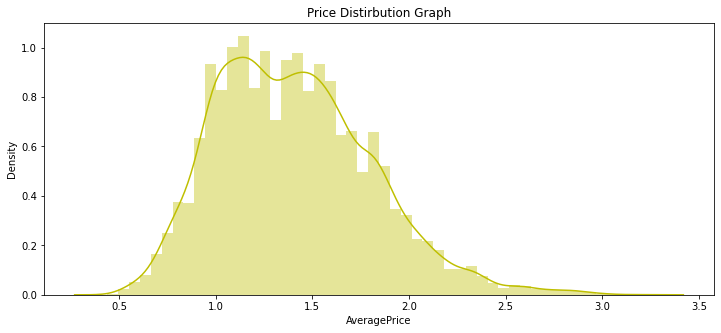

In [27]:
plt.figure(figsize=(12,5))
plt.title("Price Distirbution Graph")
ax = sns.distplot(df["AveragePrice"], color = 'y')


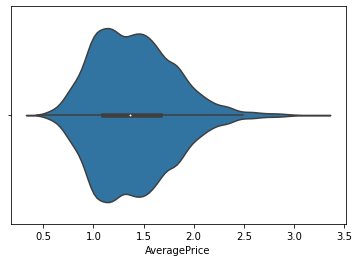

In [28]:
sns.violinplot(x='AveragePrice',data=df)
#show plot
plt.show()

Here we can see most of the avodoes price lies between 1 to 1.5.

The highest price of single avocado is 3.03 and lowest price is 0.44 

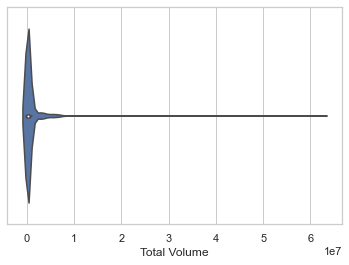

In [29]:
sns.set (style='whitegrid')
sns.violinplot(df['Total Volume'])
plt.show()

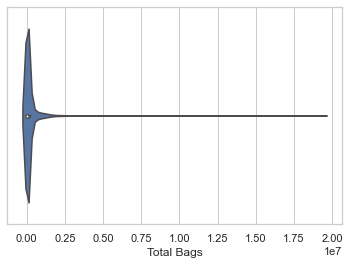

In [30]:
sns.set (style='whitegrid')
sns.violinplot(df['Total Bags'])
plt.show()

### Price distribution graph in general

In [31]:
# Change of average price per calendar year- to check if seasonal changes can affect prices.

Text(0.5, 1.0, 'Average Price by Month')

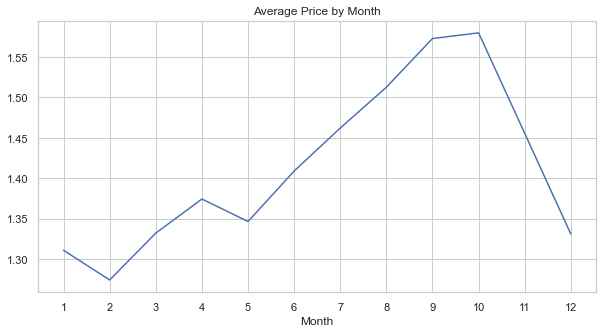

In [32]:
dategroup=df.groupby('Month').mean()
fig, ax = plt.subplots(figsize=(10,5))
ax.xaxis.set(ticks=range(0,13)) # Manually set x-ticks
dategroup['AveragePrice'].plot(x=df.Month)
plt.title('Average Price by Month')

The price of each avocado is less at the beginning of the year and highest around Sept-Oct which again decreases by Dec.

Text(0.5, 1.0, 'Average Price by Date')

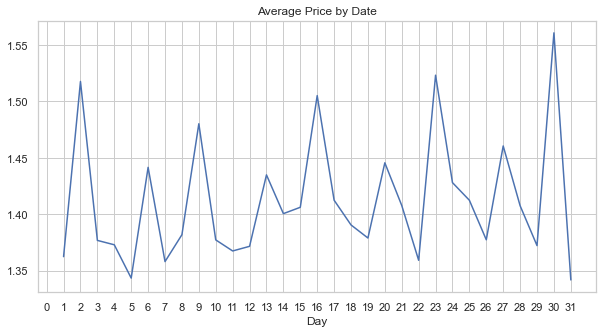

In [33]:
dategroup=df.groupby('Day').mean()
fig, ax = plt.subplots(figsize=(10,5))
ax.xaxis.set(ticks=range(0,32)) # Manually set x-ticks
dategroup['AveragePrice'].plot(x=df.Day)
plt.title('Average Price by Date')

(array([0, 1, 2, 3]),
 [Text(0, 0, '2015'),
  Text(1, 0, '2016'),
  Text(2, 0, '2017'),
  Text(3, 0, '2018')])

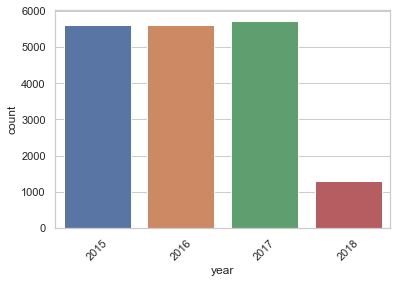

In [34]:
# Bar Chart to indicate the year
plt.figure(figsize=[6,4])
sns.countplot(x = 'year', data = df)
plt.xticks(rotation = 45)

Sale of avocado in 2017 was maximum which became least in year 2018. Now let,s compare AveragePrice with year.

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

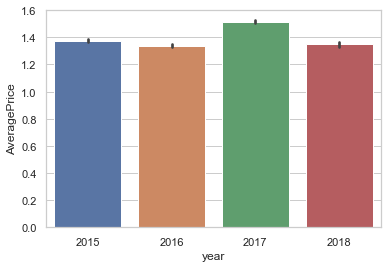

In [35]:
#checking max average price by year
sns.barplot(x = "year" , y = "AveragePrice" ,data=df )

AveragePrice is also maximum in year 2017 .

### Type Average Price in Each Region

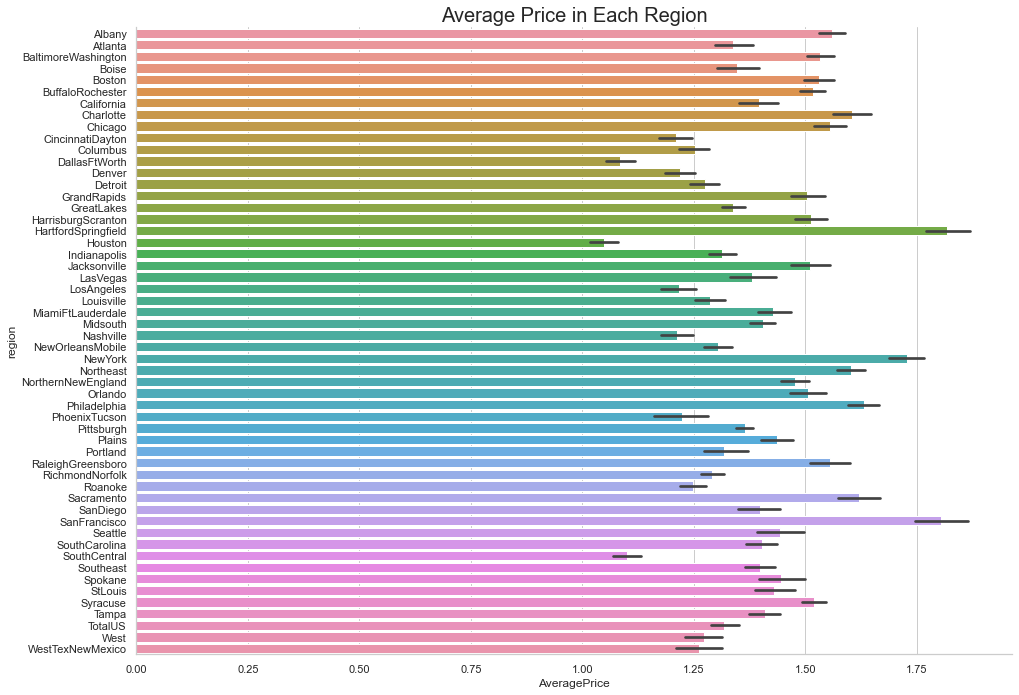

In [36]:
g=sns.catplot(x='AveragePrice',y='region',data=df,kind='bar')
g.fig.set_figwidth(20)
g.fig.set_figheight(10)
plt.title("Average Price in Each Region",{'fontsize':20})
plt.show()

Looks like the region HartfordSpringfield, SanFrancisco and NewYork are the regions with highest price ratio as compared to other regions.

#### Yearly Average Price in Each Region

Again an extremely important graphic reason for us is the price change between the states

Text(0.5, 1.0, 'Yearly Average Price in Each Region')

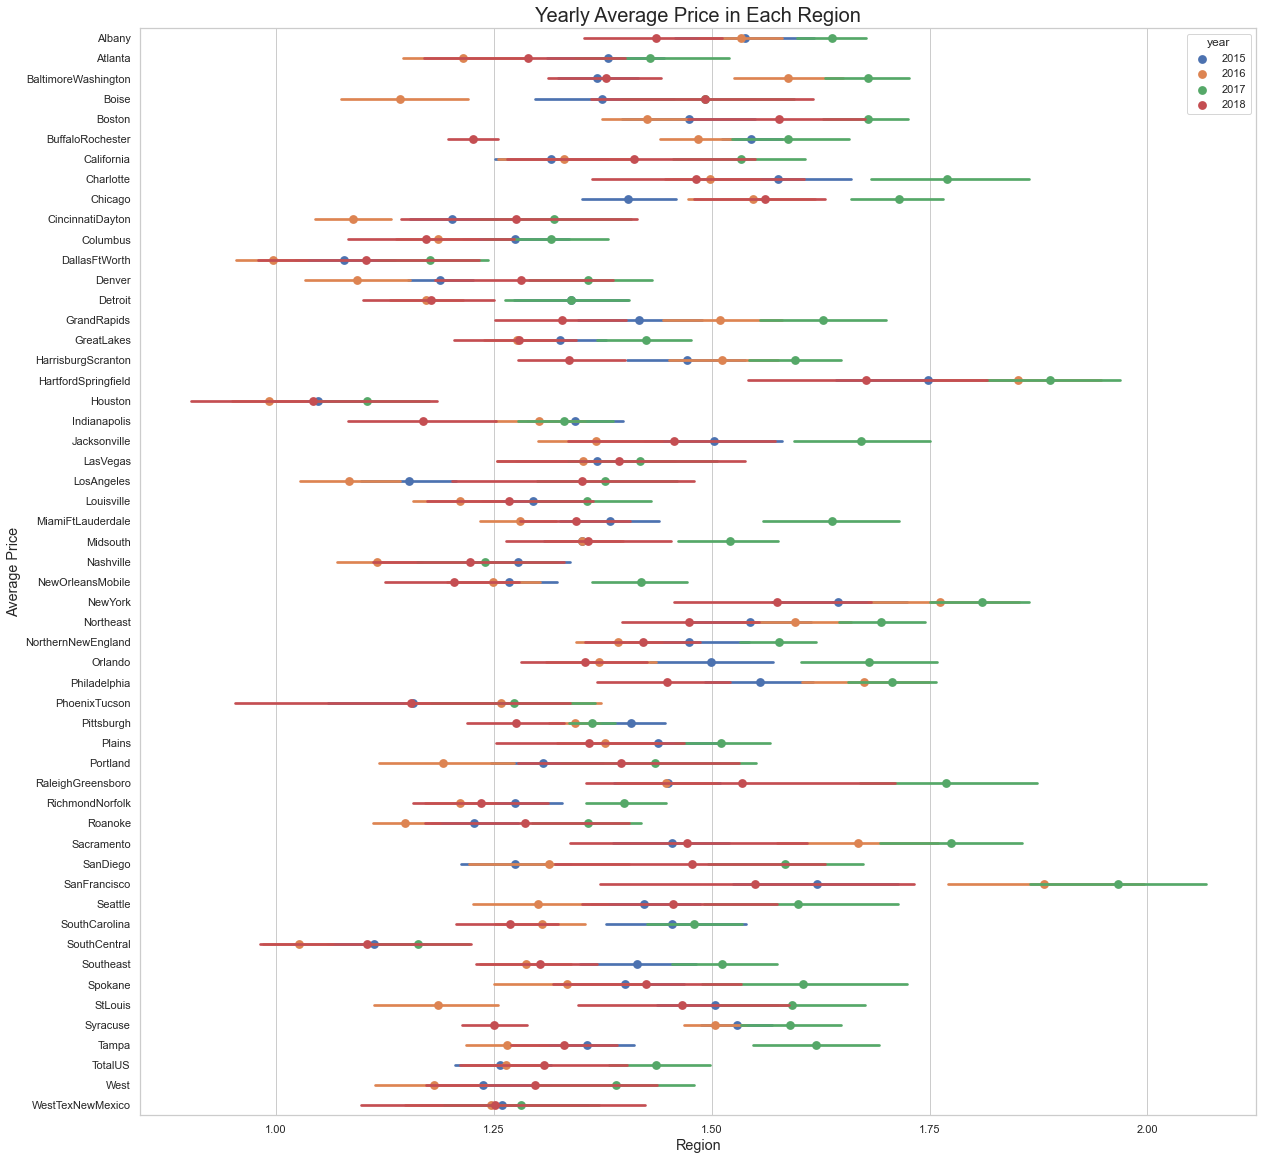

In [37]:
plt.figure(figsize=(20,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice',y='region',data=df, hue='year',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('Region',{'fontsize' : 'large'})
plt.ylabel('Average Price',{'fontsize':'large'})
plt.title("Yearly Average Price in Each Region",{'fontsize':20})

### Type Average Price in Each Region

<AxesSubplot:xlabel='type', ylabel='count'>

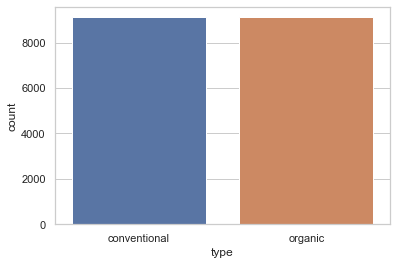

In [38]:
#countplot to indicate type of avocado
sns.countplot(df['type'])

Organice and Conventional type of avocado, as we see in the above countplot, we have balanced data in there! 

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

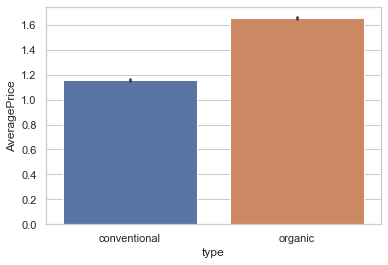

In [39]:
#plotting average price by type of avocado
sns.barplot(x = "type" , y = "AveragePrice" ,data=df )

As we expect, organic average price is much higher than the conventional avocado's average price.

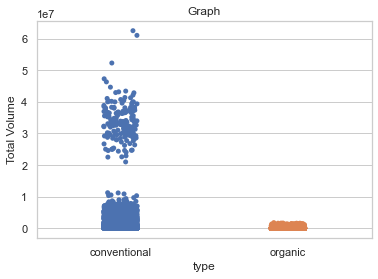

In [40]:
#Which type of Avocados are more in demand (Conventional or Organic)?
ax=sns.stripplot(x="type",y="Total Volume",data=df)
plt.title('Graph')
plt.show()

Here we can see conventional type of avocado is more is demand.

In this chart, we can see price changes according to type in cities, organic avocado is more expensive as a standard

Text(0.5, 1.0, 'Type Average Price in Each Region')

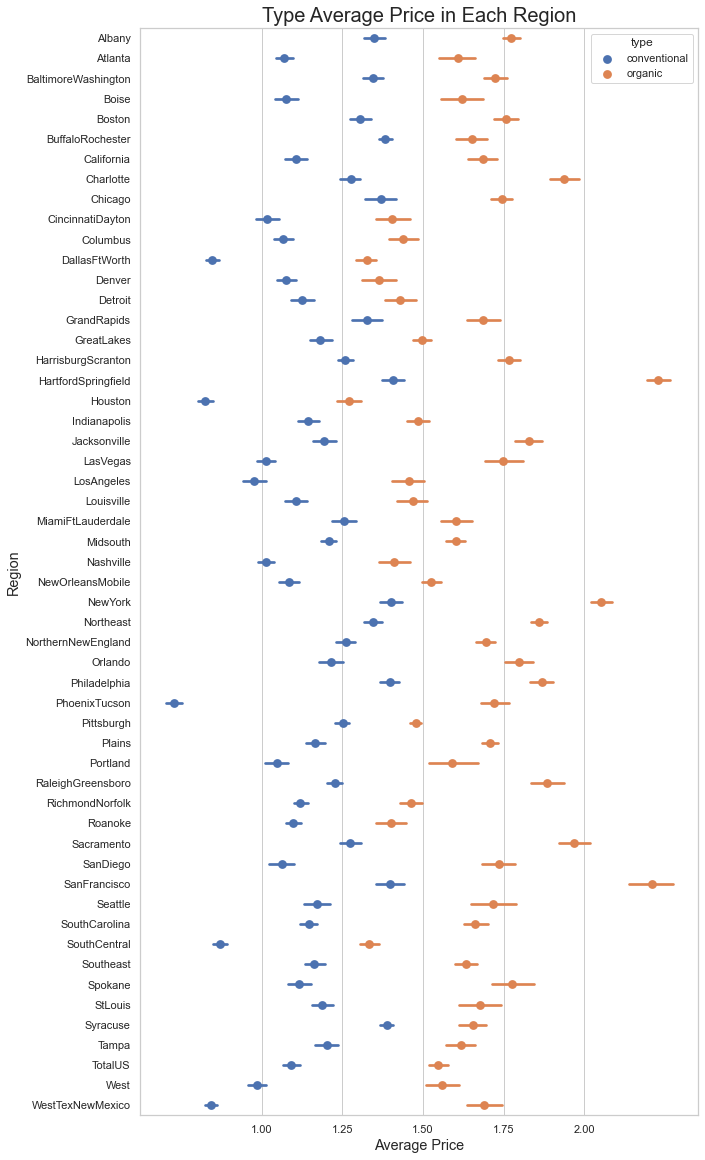

In [41]:
plt.figure(figsize=(10,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice',y='region',data=df, hue='type',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('Average Price',{'fontsize' : 'large'})
plt.ylabel('Region',{'fontsize':'large'})
plt.title("Type Average Price in Each Region",{'fontsize':20})

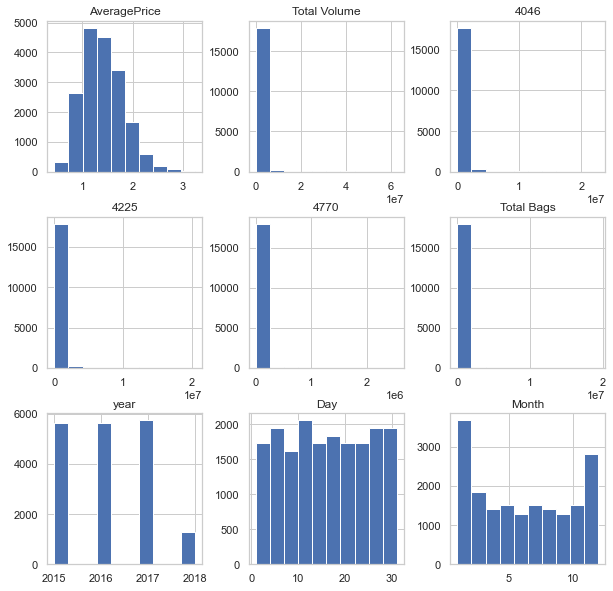

In [42]:
# checking the distribution of the numeric features
df.select_dtypes(exclude="object").hist(figsize= (10,10)); 

Total Volume,puc 4046,4225,4770,Total Bags are right skewed.

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   type          18249 non-null  object 
 7   year          18249 non-null  int64  
 8   region        18249 non-null  object 
 9   Day           18249 non-null  int64  
 10  Month         18249 non-null  int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 1.5+ MB


In [44]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,type,year,region,Day,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,conventional,2015,Albany,27,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,conventional,2015,Albany,20,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,conventional,2015,Albany,13,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,conventional,2015,Albany,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,conventional,2015,Albany,29,11


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   type          18249 non-null  object 
 7   year          18249 non-null  int64  
 8   region        18249 non-null  object 
 9   Day           18249 non-null  int64  
 10  Month         18249 non-null  int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 1.5+ MB


In [46]:
# use label encoder to change data type in type and region columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list=['type','region']
for val in list:
    df[val]=le.fit_transform(df[val].astype(str))

In [47]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,type,year,region,Day,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,0,2015,0,27,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,0,2015,0,20,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,0,2015,0,13,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,0,2015,0,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,0,2015,0,29,11
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,1,2018,53,4,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,1,2018,53,28,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,1,2018,53,21,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,1,2018,53,14,1


## To Check the Correlation

In [48]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,type,year,region,Day,Month
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,0.615845,0.093197,-0.011716,0.027386,0.162409
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,-0.232434,0.017193,0.174176,-0.009747,-0.024689
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,-0.225819,0.003353,0.192073,-0.010159,-0.025803
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,-0.232289,-0.009559,0.145726,-0.012393,-0.022108
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,-0.210027,-0.036531,0.095252,-0.009009,-0.033424
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,-0.217788,0.071552,0.175256,-0.004988,-0.022724
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,1.000000,-0.000032,-0.000280,-0.000013,-0.000085
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,-0.000032,1.000000,-0.000055,0.004475,-0.177050
region,-0.011716,0.174176,0.192073,0.145726,0.095252,0.175256,-0.000280,-0.000055,1.000000,-0.000021,-0.000144
Day,0.027386,-0.009747,-0.010159,-0.012393,-0.009009,-0.004988,-0.000013,0.004475,-0.000021,1.000000,0.010621


Here we can See that Total Volume, 4046,4225,4770 and Total Bags are negatively correlated with AveragePrice.
Date , months and year is positively correlated with Average price.so we can say Average price highly depends on time of the year.

Some multicollinearity is also seen between the columns.

<AxesSubplot:>

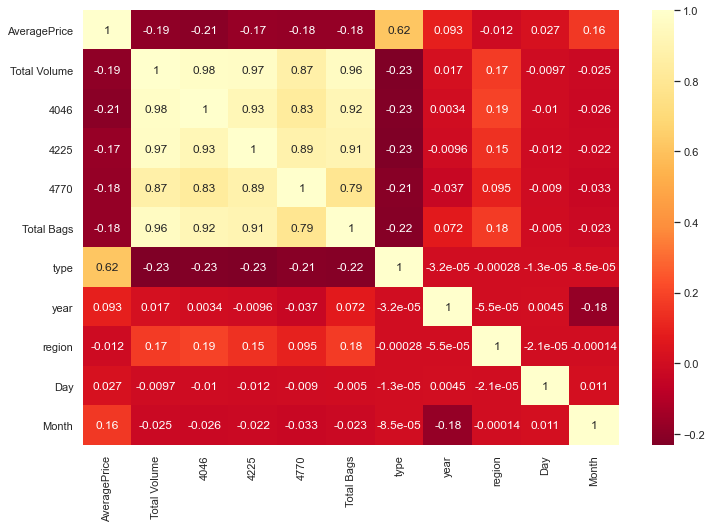

In [49]:
# Use heatmap to check correlation for better understanding.
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='YlOrRd_r',annot=True)

As we can from the heatmap above, almost all the Features are not highly correleted with the Average Price column. Instead, if we check and notice the light color shades in our above histogram, we can notice most of the features are correlated with each other.

Here Total Volumn,4046,4225,4770 and total bags have multicollinearity. Also  4046,4225 and 4770 arepart of total volumn only. So we will drop these three columns after checking VIF.

## Variance inflation factor

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df.drop('AveragePrice', axis=1)
y=df['AveragePrice']
x.head(2)

,Total Volume,4046,4225,4770,Total Bags,type,year,region,Day,Month
0,64236.62,1036.74,54454.85,48.16,8696.87,0,2015,0,27,12
1,54876.98,674.28,44638.81,58.33,9505.56,0,2015,0,20,12


In [51]:
x.shape[1]

10

In [52]:
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i)for i in range (x.shape[1])]
    vif['features']=x.columns
    print(vif)

In [53]:
vif_calc()

     VIF Factor      features
0  5.202468e+09  Total Volume
1  6.933733e+08          4046
2  6.320905e+08          4225
3  4.963758e+06          4770
4  4.236271e+08    Total Bags
5  2.122733e+00          type
6  1.122645e+01          year
7  4.109519e+00        region
8  4.187486e+00           Day
9  4.061359e+00         Month


Total Volumn,4046,4225,4770 has high vif. Droping column 4046,4225,4770

In [54]:
df.drop(['4046','4225','4770'],axis=1,inplace=True)
df.head(2)

,AveragePrice,Total Volume,Total Bags,type,year,region,Day,Month
0,1.33,64236.62,8696.87,0,2015,0,27,12
1,1.35,54876.98,9505.56,0,2015,0,20,12


In [55]:
x=df.drop('AveragePrice', axis=1)
y=df['AveragePrice']
x.head(2)

,Total Volume,Total Bags,type,year,region,Day,Month
0,64236.62,8696.87,0,2015,0,27,12
1,54876.98,9505.56,0,2015,0,20,12


In [56]:
x.shape[1]

7

In [57]:
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i)for i in range (x.shape[1])]
    vif['features']=x.columns
    print(vif)
vif_calc()

   VIF Factor      features
0   14.746413  Total Volume
1   14.622044    Total Bags
2    2.118724          type
3   11.135764          year
4    4.022724        region
5    4.187175           Day
6    4.057258         Month


continuing with this model

## Check For Skewness

In [58]:
x=df.drop('AveragePrice', axis=1)
y=df['AveragePrice']
x.head(2)

,Total Volume,Total Bags,type,year,region,Day,Month
0,64236.62,8696.87,0,2015,0,27,12
1,54876.98,9505.56,0,2015,0,20,12


In [59]:
df.skew().sort_values(ascending=False)

Total Bags      9.756072
Total Volume    9.007687
AveragePrice    0.580303
year            0.215339
Month           0.106617
Day             0.014310
type            0.000329
region          0.000030
dtype: float64

Since only two columns total bags and total volume are skewed towards right. So applying log transfer on both the columns

In [60]:
# Applying log transformation and removing skewness
df["Total Volume"] = np.log1p(df["Total Volume"])
df["Total Bags"] = np.log1p(df["Total Bags"])

In [61]:
df.skew().sort_values(ascending=False)

AveragePrice    0.580303
year            0.215339
Month           0.106617
Total Volume    0.088098
Day             0.014310
type            0.000329
region          0.000030
Total Bags     -0.218874
dtype: float64

Now there is no skewness in the dataset

## Checking For Outliers

AveragePrice       AxesSubplot(0.125,0.536818;0.168478x0.343182)
Total Volume    AxesSubplot(0.327174,0.536818;0.168478x0.343182)
Total Bags      AxesSubplot(0.529348,0.536818;0.168478x0.343182)
type            AxesSubplot(0.731522,0.536818;0.168478x0.343182)
year                  AxesSubplot(0.125,0.125;0.168478x0.343182)
region             AxesSubplot(0.327174,0.125;0.168478x0.343182)
Day                AxesSubplot(0.529348,0.125;0.168478x0.343182)
Month              AxesSubplot(0.731522,0.125;0.168478x0.343182)
dtype: object

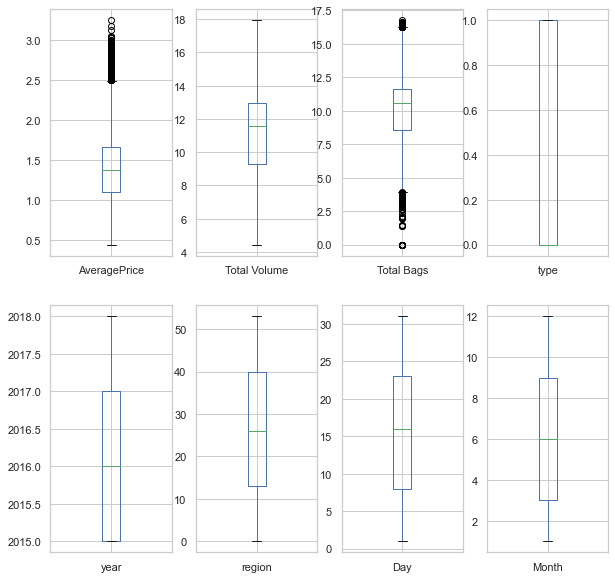

In [62]:
df.plot(kind='box',subplots=True,layout=(2,4),figsize=(10,10))

Here we see there are so many outliers in AveragePrice And Total Bags.

### Removing Outliers

In [63]:
from scipy.stats import zscore

z=np.abs(zscore(df))
z

array([[0.18868864, 0.10728205, 0.49407375, ..., 1.7002522 , 1.29185687,
        1.64763162],
       [0.13901962, 0.1759487 , 0.45476066, ..., 1.7002522 , 0.49423066,
        1.64763162],
       [1.18206895, 0.15869039, 0.52304131, ..., 1.7002522 , 0.30339555,
        1.64763162],
       ...,
       [1.15237477, 0.77890112, 0.45997538, ..., 1.70081131, 0.60817726,
        1.46495942],
       [1.30138182, 0.70779758, 0.39142409, ..., 1.70081131, 0.18944895,
        1.46495942],
       [0.53151208, 0.67454176, 0.35120408, ..., 1.70081131, 0.98707516,
        1.46495942]])

In [64]:
z.shape

(18249, 8)

In [65]:
threshold=3
print(np.where(z>3))

(array([ 9192,  9212,  9894, 10232, 10334, 11024, 11316, 11318, 11319,
       11320, 11320, 11321, 11321, 11322, 11323, 11324, 11324, 11325,
       11325, 11326, 11326, 11327, 11327, 11328, 11329, 11329, 11330,
       11330, 11331, 11331, 11332, 11332, 11333, 11334, 11335, 11336,
       11337, 11338, 11339, 11340, 11341, 11342, 11347, 11348, 11349,
       11350, 11351, 11352, 11353, 11354, 11387, 11388, 11594, 11595,
       11596, 11597, 11598, 11611, 11614, 11662, 11663, 12132, 12821,
       12823, 13033, 13035, 13037, 13038, 13395, 13657, 13661, 14019,
       14020, 14073, 14074, 14119, 14120, 14121, 14122, 14123, 14124,
       14125, 14126, 14128, 14129, 14177, 14385, 14385, 14404, 14699,
       14701, 14702, 14807, 14911, 14912, 14913, 14914, 14915, 14916,
       14917, 14918, 14919, 15124, 15125, 15127, 15128, 15129, 15130,
       15510, 15511, 15667, 15668, 15671, 15673, 15674, 15814, 15871,
       16024, 16050, 16055, 16395, 16399, 16421, 16660, 16661, 16662,
       16663, 16664

In [66]:
df_new=df[(z<3).all(axis=1)]
df_new

,AveragePrice,Total Volume,Total Bags,type,year,region,Day,Month
0,1.33,11.070344,9.070833,0,2015,0,27,12
1,1.35,10.912867,9.159737,0,2015,0,20,12
2,0.93,11.680313,9.005325,0,2015,0,13,12
3,1.08,11.277116,8.667708,0,2015,0,6,12
4,1.28,10.840377,8.729874,0,2015,0,29,11
...,...,...,...,...,...,...,...,...
18244,1.63,9.745419,9.510421,1,2018,53,4,2
18245,1.71,9.538855,9.134090,1,2018,53,28,1
18246,1.87,9.530085,9.147945,1,2018,53,21,1
18247,1.93,9.693150,9.302969,1,2018,53,14,1


In [67]:
print(df.shape)
print(df_new.shape)

(18249, 8)
(18077, 8)


In [68]:
# Percentage Data loss

loss_percent=(18249-18077)/18249*100
print(loss_percent)

0.9425173982136008


0.942% data is lost

## Model Training By Regression

In [69]:
x = df_new.drop(columns=['AveragePrice'])
y = df_new[["AveragePrice"]]
print(x.shape)
print(y.shape)

#Above we are using AveragePrice as output variable as it is our target value and that's the value we need to predict with our best algorithm!

(18077, 7)
(18077, 1)


In [70]:
#Standardize the value of x so which will convert the mean around 0 and SD will become 1 , and make the data normally distributed
sc = StandardScaler()
sc.fit_transform(x)
x = pd.DataFrame(x,columns=x.columns)
x

,Total Volume,Total Bags,type,year,region,Day,Month
0,11.070344,9.070833,0,2015,0,27,12
1,10.912867,9.159737,0,2015,0,20,12
2,11.680313,9.005325,0,2015,0,13,12
3,11.277116,8.667708,0,2015,0,6,12
4,10.840377,8.729874,0,2015,0,29,11
...,...,...,...,...,...,...,...
18244,9.745419,9.510421,1,2018,53,4,2
18245,9.538855,9.134090,1,2018,53,28,1
18246,9.530085,9.147945,1,2018,53,21,1
18247,9.693150,9.302969,1,2018,53,14,1


### Finding Best Random State

In [71]:
maxScore = 0
maxRS = 0

for i in range(1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.23,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    acc=r2_score(y_test,pred_test)
    if acc>maxScore:
        maxScore=acc
        maxRS=i
print('Best score is',maxScore,'on Random State',maxRS)

Best score is 0.5067863171130036 on Random State 161


### Creating and Training the Model

In [72]:
# Make input and output variables into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=161,test_size=0.20)

In [73]:
# Checking train and test data size
print(x_train.shape,'\t',x_test.shape)

(14461, 7) 	 (3616, 7)


In [74]:
print(y_train.shape,'\t',y_test.shape)

(14461, 1) 	 (3616, 1)


In [75]:
# Importing models library

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
# Importing error metrics

from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [76]:
# Using algorithms via for loop

model=[LinearRegression(),Lasso(),Ridge(),SVR(),KNeighborsRegressor(),DecisionTreeRegressor()]
for p in model:
    p.fit(x_train,y_train)
    print('Score of', p , 'is:' , p.score(x_train,y_train))
    predp=p.predict(x_test)
    print(f"test_score {p.score(x_test,y_test)}")
    print('Error:')
    print('Mean absolute error:', mean_absolute_error(y_test,predp))
    print('Mean squared error:', mean_squared_error(y_test,predp))
    print('Root Mean squared error:', np.sqrt(mean_squared_error(y_test,predp)))
    print('r2_score:', r2_score(y_test,predp))
    print('********************************************************************************************')
    print('\n')

Score of LinearRegression() is: 0.4758237799959648
test_score 0.5113678787290732
Error:
Mean absolute error: 0.2175735559686565
Mean squared error: 0.07488582584531922
Root Mean squared error: 0.27365274682582524
r2_score: 0.5113678787290732
********************************************************************************************


Score of Lasso() is: 0.0
test_score -1.2087092584600612e-05
Error:
Mean absolute error: 0.31921678493818895
Mean squared error: 0.1532578963545211
Root Mean squared error: 0.39148166796737893
r2_score: -1.2087092584600612e-05
********************************************************************************************


Score of Ridge() is: 0.47582373472455897
test_score 0.511358852915835
Error:
Mean absolute error: 0.21757645614723273
Mean squared error: 0.07488720910574939
Root Mean squared error: 0.27365527421511426
r2_score: 0.511358852915835
********************************************************************************************


Score of SVR() i

We can see that  DecisionTreeRegressor() has good r2 score. Also Root mean squared error is least in  DecisionTreeRegressor(). So selecting that model

In [77]:
# Finding out best random state using GridsearchCV
from sklearn.model_selection import GridSearchCV
dt=DecisionTreeRegressor()
parameters={'random_state':range(42,500)}
gc=GridSearchCV(dt,parameters)
gc.fit(x,y)
gc.best_params_

{'random_state': 160}

In [78]:
#Again checking out Decision Tree Regressor scores using 160 as Random State

dtc=DecisionTreeRegressor(criterion='mae',random_state=160)
dtc.fit(x_train,y_train)
print('Score:', dtc.score(x_train,y_train))
preddt=dtc.predict(x_test)
print('\n')
print('Mean absolute error:', mean_absolute_error(y_test,preddt))
print('Mean squared error:', mean_squared_error(y_test,preddt))
print('Root Mean squared error:', np.sqrt(mean_squared_error(y_test,preddt)))
print('\n')
print('r2_score:', r2_score(y_test,preddt))

Score: 1.0


Mean absolute error: 0.12672566371681415
Mean squared error: 0.03823799778761062
Root Mean squared error: 0.19554538549301187


r2_score: 0.7504959882434006


## Cross Validation

In [79]:
# Cross validate of DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtc,x,y,cv=5,scoring='r2')
print('Score:', score)
print('Mean Score:', score.std())
print('Standard Deviation:', score.std())

Score: [-0.72012347  0.23141611 -0.07733995 -0.31393162 -0.45231207]
Mean Score: 0.32442321422007525
Standard Deviation: 0.32442321422007525


## Using Ensemble Technique to boostup score

In [80]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100,random_state=160)
rf.fit(x_train,y_train)
print('score:',rf.score(x_train,y_train))
predrf=rf.predict(x_test)
print('\n')
print('Mean absolute error:', mean_absolute_error(y_test,predrf))
print('Mean squared error:', mean_squared_error(y_test,predrf))
print('Root Mean squared error:', np.sqrt(mean_squared_error(y_test,predrf)))
print('\n')
print('r2_score:', r2_score(y_test,predrf))

score: 0.9830918909617699


Mean absolute error: 0.09209728982300885
Mean squared error: 0.01665725856747787
Root Mean squared error: 0.12906300231854934


r2_score: 0.8913109190356377


In [81]:
from sklearn.ensemble import AdaBoostRegressor


ad=AdaBoostRegressor(base_estimator=dtc,n_estimators=20,learning_rate=1.0,random_state=160)
ad.fit(x_train,y_train)
print('score:',ad.score(x_train,y_train))
predad=ad.predict(x_test)
print('\n')
print('Mean absolute error:', mean_absolute_error(y_test,predad))
print('Mean squared error:', mean_squared_error(y_test,predad))
print('Root Mean squared error:', np.sqrt(mean_squared_error(y_test,predad)))
print('\n')
print('r2_score:', r2_score(y_test,predad))

score: 0.9994030119129151


Mean absolute error: 0.08784845132743362
Mean squared error: 0.016608573008849558
Root Mean squared error: 0.1288742526994805


r2_score: 0.8916285936759222


Since AdaBoostRegressor is giving better score than DecisionTreeregressor and RandomForestRegressor . So checking cv for AdaBoostRegressor.

In [82]:
# Cross validate of AdaboostRegressor
from sklearn.model_selection import cross_val_score
score=cross_val_score(ad,x,y,cv=5,scoring='r2',verbose=1,n_jobs=-1)
print('Score:', score)
print('Mean Score:', score.mean())
print('Standard Deviation:', score.std())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Score: [-0.32962053  0.48071759  0.22851567  0.16925737 -0.15947496]
Mean Score: 0.07787902723969982
Standard Deviation: 0.2883446261600449


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished


## Hyper Parameter Tuning

In [83]:
from sklearn.model_selection import GridSearchCV
# Choosing Ada Boost Regressor
fmod_param = {'n_estimators' : [50, 100, 150, 200],
              'learning_rate' : [0.001, 0.01, 0.1, 1],
              'loss' : ["linear", "square", "exponential"],
              'random_state' : [21, 42, 104, 111]
             }

In [84]:
GSCV = GridSearchCV(estimator=AdaBoostRegressor(), param_grid=fmod_param,n_jobs=-1, verbose=1, cv=5)

In [85]:
%%time
GSCV.fit(x_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Wall time: 3min 53s


GridSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100, 150, 200],
                         'random_state': [21, 42, 104, 111]},
             verbose=1)

In [86]:
GSCV.best_params_

{'learning_rate': 0.1,
 'loss': 'exponential',
 'n_estimators': 200,
 'random_state': 111}

In [87]:
Final_Model = AdaBoostRegressor(learning_rate=0.1, loss="exponential", n_estimators=200, random_state=111)
Classifier = Final_Model.fit(x_train, y_train)
fmod_pred = Final_Model.predict(x_test)
fmod_r2 = r2_score(y_test, fmod_pred, multioutput='variance_weighted')*100
print("R2 score for the Best Model is:", fmod_r2)

fmod_r2score=cross_val_score(Final_Model,x_train,y_train,cv=5)
fmod_r2=fmod_r2score.mean()
print('Cross Val score', fmod_r2*100)

R2 score for the Best Model is: 54.275776398902856
Cross Val score 50.457551589197756


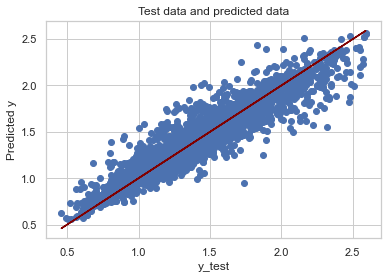

In [88]:
# Plotting scatter plot between test data and predicted data for AdaBoostRegressor
plt.scatter(y_test,predad)
plt.plot(y_test,y_test,color='maroon')
plt.xlabel('y_test')
plt.ylabel('Predicted y')
plt.title('Test data and predicted data')
plt.show()

## Model Saving

In [89]:
# Saving the AdaBoostRegressor
import pickle
filename='Avocado_AveragePrice.pkl'
pickle.dump(ad,open(filename,'wb'))

In [90]:
#Conslusion
import pickle
loaded_model=pickle.load(open('Avocado_AveragePrice.pkl','rb'))
result_v2=loaded_model.score(x_test,y_test)
print("Accuracy Score :",result_v2*100)

Accuracy Score : 89.16285936759222


In [91]:
Conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],predad[:]],index=["Predicted","Original"])
Conclusion

,0,1,2,3,4,5,6,7,8,9,...,3606,3607,3608,3609,3610,3611,3612,3613,3614,3615
Predicted,0.76,1.09,1.4,1.94,1.4,1.1,1.76,1.34,1.35,1.25,...,1.21,1.15,1.08,1.43,1.6,2.32,1.47,1.09,2.06,2.38
Original,0.76,1.09,1.4,1.94,1.4,1.1,1.76,1.34,1.35,1.25,...,1.21,1.15,1.08,1.43,1.6,2.32,1.47,1.09,2.06,2.38


## Model Training by Classification

In [92]:
x1 = df_new.drop(columns=['region'])
y1 = df_new[["region"]]
print(x1.shape)
print(y1.shape)

#Above we are usingregion as output variable as it is our target value and that's the value we need to predict with our best algorithm!

(18077, 7)
(18077, 1)


In [93]:
y1=pd.DataFrame(df_new['region'])
y1

,region
0,0
1,0
2,0
3,0
4,0
...,...
18244,53
18245,53
18246,53
18247,53


In [94]:
sc = StandardScaler()
sc.fit_transform(x1)
x1 = pd.DataFrame(x1,columns=x1.columns)
x1

,AveragePrice,Total Volume,Total Bags,type,year,Day,Month
0,1.33,11.070344,9.070833,0,2015,27,12
1,1.35,10.912867,9.159737,0,2015,20,12
2,0.93,11.680313,9.005325,0,2015,13,12
3,1.08,11.277116,8.667708,0,2015,6,12
4,1.28,10.840377,8.729874,0,2015,29,11
...,...,...,...,...,...,...,...
18244,1.63,9.745419,9.510421,1,2018,4,2
18245,1.71,9.538855,9.134090,1,2018,28,1
18246,1.87,9.530085,9.147945,1,2018,21,1
18247,1.93,9.693150,9.302969,1,2018,14,1


## Finding The Best Random State

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [96]:
maxAcc = 0
maxRS = 0

for i in range(1,200):
    x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=i)
    LR = LogisticRegression()
    LR.fit(x1_train,y1_train)
    predrf= LR.predict(x1_test)
    acc=accuracy_score(y1_test,predrf)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print('Best Accuracy score is',maxAcc,'on Random State',maxRS)

Best Accuracy score is 0.06664823008849557 on Random State 9


In [97]:
# Make input and output variables into train and test data
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,random_state=9,test_size=0.2)

In [98]:
# Checking train and test data size
print(x1_train.shape,'\t',x1_test.shape)

(14461, 7) 	 (3616, 7)


In [99]:
print(y1_train.shape,'\t',y1_test.shape)

(14461, 1) 	 (3616, 1)


In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [101]:
lg=LogisticRegression()
lg.fit(x1_train,y1_train)

LogisticRegression()

In [102]:
pred=lg.predict(x1_test)
print(pred)

[21  6 32 ... 52 40 52]


In [103]:
print('accuracy_score:' , accuracy_score(y1_test,pred))
print(confusion_matrix(y1_test,pred))
print(classification_report(y1_test,pred))

accuracy_score: 0.06664823008849557
[[ 6  0  0 ...  0  0  0]
 [ 3  0  0 ...  0  3  0]
 [ 0  0  3 ...  0  1  0]
 ...
 [ 0  0  0 ... 31  9  0]
 [ 0  0  0 ... 24  4  0]
 [ 1  0  0 ...  0  6  0]]
              precision    recall  f1-score   support

           0       0.04      0.07      0.06        80
           1       0.00      0.00      0.00        65
           2       0.19      0.05      0.07        66
           3       0.06      0.22      0.10        68
           4       0.00      0.00      0.00        59
           5       0.11      0.07      0.09        80
           6       0.06      0.06      0.06        66
           7       0.00      0.00      0.00        55
           8       0.17      0.39      0.23        72
           9       0.06      0.03      0.04        64
          10       0.33      0.02      0.03        65
          11       0.00      0.00      0.00        63
          12       0.05      0.13      0.07        67
          13       0.00      0.00      0.00        

### Checking with different algorithms

In [104]:
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),]

for m in model:
    m.fit(x1_train,y1_train)
    m.score(x1_train,y1_train)
    predm=m.predict(x1_test)
    print('Accuracy score of',m, 'is:')
    print(accuracy_score(y1_test,predm))
    print(confusion_matrix(y1_test,predm))
    print(classification_report(y1_test,predm))
    print('\n')

Accuracy score of LogisticRegression() is:
0.06664823008849557
[[ 6  0  0 ...  0  0  0]
 [ 3  0  0 ...  0  3  0]
 [ 0  0  3 ...  0  1  0]
 ...
 [ 0  0  0 ... 31  9  0]
 [ 0  0  0 ... 24  4  0]
 [ 1  0  0 ...  0  6  0]]
              precision    recall  f1-score   support

           0       0.04      0.07      0.06        80
           1       0.00      0.00      0.00        65
           2       0.19      0.05      0.07        66
           3       0.06      0.22      0.10        68
           4       0.00      0.00      0.00        59
           5       0.11      0.07      0.09        80
           6       0.06      0.06      0.06        66
           7       0.00      0.00      0.00        55
           8       0.17      0.39      0.23        72
           9       0.06      0.03      0.04        64
          10       0.33      0.02      0.03        65
          11       0.00      0.00      0.00        63
          12       0.05      0.13      0.07        67
          13       0.00 

Accuracy score of KNeighborsClassifier() is:
0.011891592920353982
[[ 8  0  0 ...  0  0  0]
 [ 0  0 14 ...  0  0  0]
 [ 0 15  0 ...  0  0  0]
 ...
 [ 0  1 11 ... 30  0  0]
 [ 0  2  0 ...  0  1  0]
 [ 0 21 23 ...  0  0  0]]
              precision    recall  f1-score   support

           0       0.04      0.10      0.05        80
           1       0.00      0.00      0.00        65
           2       0.00      0.00      0.00        66
           3       0.00      0.00      0.00        68
           4       0.00      0.00      0.00        59
           5       0.00      0.00      0.00        80
           6       0.00      0.02      0.01        66
           7       0.00      0.00      0.00        55
           8       0.01      0.01      0.01        72
           9       0.00      0.00      0.00        64
          10       0.00      0.00      0.00        65
          11       0.00      0.00      0.00        63
          12       0.00      0.00      0.00        67
          13       0.

In [105]:
dtc=DecisionTreeClassifier()
parameters={'criterion':['gini','entropy'],'random_state':range(1,100)}
clf=GridSearchCV(dtc,parameters)
clf.fit(x1,y1)
clf.best_params_

{'criterion': 'gini', 'random_state': 94}

In [106]:
dtc=DecisionTreeClassifier(criterion='gini',random_state=94)
dtc.fit(x1_train,y1_train)
print('score',dtc.score(x1_train,y1_train))
preddtc=dtc.predict(x1_test)
print('Accuracy score',accuracy_score(y1_test,preddtc))
print('confusion matrix',confusion_matrix(y1_test,preddtc))
print(classification_report(y1_test,preddtc))

score 1.0
Accuracy score 0.47400442477876104
confusion matrix [[53  0  0 ...  0  0  0]
 [ 0 17  0 ...  0  0  1]
 [ 0  1 35 ...  0  0  4]
 ...
 [ 0  0  0 ... 63  0  0]
 [ 0  0  0 ...  0 43  0]
 [ 0  0  1 ...  0  0 31]]
              precision    recall  f1-score   support

           0       0.66      0.66      0.66        80
           1       0.28      0.26      0.27        65
           2       0.64      0.53      0.58        66
           3       0.47      0.54      0.50        68
           4       0.49      0.56      0.52        59
           5       0.56      0.53      0.54        80
           6       0.75      0.68      0.71        66
           7       0.41      0.40      0.40        55
           8       0.71      0.72      0.72        72
           9       0.39      0.41      0.40        64
          10       0.28      0.25      0.26        65
          11       0.40      0.49      0.44        63
          12       0.47      0.48      0.47        67
          13       0.28  

## Using Ensemble Technique to boostup score

In [107]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100,random_state=9,criterion='gini')
#RandomForestClassifier(100)---Default
rf.fit(x1_train,y1_train)
predrf=rf.predict(x1_test)
print(accuracy_score(y1_test,predrf))
print(confusion_matrix(y1_test,predrf))
print(classification_report(y1_test,predrf))

0.5251659292035398
[[65  0  0 ...  0  0  0]
 [ 0 20  0 ...  0  0  3]
 [ 0  0 50 ...  0  0  1]
 ...
 [ 0  0  0 ... 63  0  0]
 [ 0  0  0 ...  0 47  0]
 [ 0  0  1 ...  0  0 40]]
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        80
           1       0.38      0.31      0.34        65
           2       0.70      0.76      0.73        66
           3       0.62      0.57      0.60        68
           4       0.51      0.64      0.57        59
           5       0.55      0.54      0.54        80
           6       0.81      0.82      0.81        66
           7       0.38      0.53      0.44        55
           8       0.69      0.83      0.75        72
           9       0.34      0.38      0.36        64
          10       0.22      0.18      0.20        65
          11       0.45      0.62      0.52        63
          12       0.57      0.63      0.60        67
          13       0.36      0.25      0.30        68
          14  

In [108]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=100,random_state=9,base_estimator=dtc,algorithm='SAMME',learning_rate=0.01)
ad.fit(x1_train,y1_train)
ad_pred=ad.predict(x1_test)
print(accuracy_score(y1_test,ad_pred))
print(confusion_matrix(y1_test,ad_pred))
print(classification_report(y1_test,ad_pred))

0.4737278761061947
[[53  0  0 ...  0  0  0]
 [ 0 15  0 ...  0  0  1]
 [ 0  1 38 ...  0  0  4]
 ...
 [ 0  0  0 ... 63  0  0]
 [ 0  0  0 ...  0 44  0]
 [ 0  1  2 ...  0  0 29]]
              precision    recall  f1-score   support

           0       0.68      0.66      0.67        80
           1       0.23      0.23      0.23        65
           2       0.67      0.58      0.62        66
           3       0.49      0.54      0.52        68
           4       0.52      0.56      0.54        59
           5       0.62      0.53      0.57        80
           6       0.82      0.71      0.76        66
           7       0.38      0.38      0.38        55
           8       0.68      0.72      0.70        72
           9       0.36      0.39      0.38        64
          10       0.26      0.22      0.24        65
          11       0.42      0.49      0.45        63
          12       0.50      0.49      0.50        67
          13       0.31      0.26      0.29        68
          14  

## Hyperparameter Tuning

In [109]:
RF = RandomForestClassifier() # Randomforest instance
from sklearn.model_selection import RandomizedSearchCV,cross_val_score

# we are checking best parameter which suited most for the model

para = {
        "criterion":["gini","entropy"],
        "max_features" : ["auto", "sqrt", "log2"],
        "min_samples_split" :[2,4,6,8], 
        "max_depth" :[2,3,4,5],
        "min_samples_leaf":[3,5,8,10],
        "max_samples" :[0.2,0.3,0.4,0.5]
}

grid = RandomizedSearchCV(RF, para, scoring= "accuracy" )

grid.fit(x1_train,y1_train)
print("score",grid.best_score_)
print("best parameter",grid.best_params_)
print("best estimator",grid.best_estimator_)
grid_pred=grid.best_estimator_.predict(x1_test) # predicting with best parameters

score 0.2851124405310859
best parameter {'min_samples_split': 4, 'min_samples_leaf': 3, 'max_samples': 0.4, 'max_features': 'auto', 'max_depth': 5, 'criterion': 'entropy'}
best estimator RandomForestClassifier(criterion='entropy', max_depth=5, max_samples=0.4,
                       min_samples_leaf=3, min_samples_split=4)


## Cross Validation

In [115]:
best_parameter_RF = RandomForestClassifier(min_samples_split= 4, min_samples_leaf = 3, max_samples =0.4, max_features = 'auto', max_depth = 5, criterion = 'entropy')

for i in range(2,7):
    cv = cross_val_score(best_parameter_RF,x1,y1,cv=i)
    print(f'at CV {i} The mean is  {cv.mean()} and the SD is {cv.std()}') 

at CV 2 The mean is  0.025169912944671097 and the SD is 0.003483699180563994
at CV 3 The mean is  0.11478536301201019 and the SD is 0.03100328219718654
at CV 4 The mean is  0.1264575381819535 and the SD is 0.0363362878540959
at CV 5 The mean is  0.1847053054504951 and the SD is 0.05038592573581597
at CV 6 The mean is  0.17358568455095058 and the SD is 0.08426855019696572


Observation

Since Randomforest worked well out of all other model, so we have done the hyperparameter tuning to set the best parameter for final model. Now i have checked the best CV as well that at level of CV is generated the best score and we have found CV 5 is at best

In [111]:
# Cross validate of RandomForestClassifier using cv=5
from sklearn.model_selection import cross_val_score
score=cross_val_score(rf,x1,y1,cv=5,scoring='accuracy')
print('Score:', score)
print('Mean Score:', score.mean())
print('Standard Deviation:', score.std())

Score: [0.21653761 0.37693584 0.32697095 0.25753804 0.14661134]
Mean Score: 0.26491875665552816
Standard Deviation: 0.08098167340631038


SINCE THE OUTCOME IS NOT BINARY, WE WILL NOT APPLY AUC ROC CURVE.

I found out best result with RandomForestRegressor by using varius technics. So i will save RandomForestRegressor as my final model.

## Model Saving

In [145]:
import pickle
filename='Predicted_Avocado_region.pkl'
pickle.dump(rf,open(filename,'wb'))